In [1]:
# Import schema functions/types
from pyspark.sql.functions import *
from pyspark.sql.types import * 

In [2]:
# Import necessary packages
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

In [3]:
# Set the schema
schema_rlogs = StructType([
    StructField("date", DateType(), True),
    StructField("time", StringType(), True),
    StructField("size", IntegerType(), True),
    StructField("r_version", StringType(), True),
    StructField("r_arch", StringType(), True),
    StructField("r_os", StringType(), True),
    StructField("package", StringType(), True),
    StructField("ip_id", StringType(), True),
    StructField("country", StringType(), True)])

In [4]:
# Import file to Apache Spark
rlogs = spark.read.format("com.databricks.spark.csv")\
    .option("header","true")\
    .option("inferSchema","true")\
    .schema(schema_rlogs)\
    .load("hdfs://localhost:8020/user/htw/2020-01-13.csv")

In [5]:
# Register dataset as Spark SQL
rlogs.createOrReplaceTempView("rlogs")

In [6]:
# Print the schema
rlogs.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)
 |-- r_version: string (nullable = true)
 |-- r_arch: string (nullable = true)
 |-- r_os: string (nullable = true)
 |-- package: string (nullable = true)
 |-- ip_id: string (nullable = true)
 |-- country: string (nullable = true)



In [7]:
# No. of rows in file
rlogs.count()

4755602

In [8]:
# Print first 5 rows
spark.sql("SELECT * FROM rlogs LIMIT 5").show()

+----------+--------+-------+---------+------+----+--------+------+-------+
|      date|    time|   size|r_version|r_arch|r_os| package| ip_id|country|
+----------+--------+-------+---------+------+----+--------+------+-------+
|2020-01-13|13:32:48| 861839|       NA|    NA|  NA|     zoo| 1.8-7|     US|
|2020-01-13|13:32:39|1132886|       NA|    NA|  NA|      sp| 1.3-2|     US|
|2020-01-13|13:32:32|  84011|       NA|    NA|  NA|lazyeval| 0.2.2|     NL|
|2020-01-13|13:32:35| 143855|       NA|    NA|  NA|  digest|0.6.23|     NL|
|2020-01-13|13:32:53|1036570|       NA|    NA|  NA|    pROC|1.15.3|     GB|
+----------+--------+-------+---------+------+----+--------+------+-------+



In [9]:
# Data Analysis / Count number of packages
spark.sql(r"""SELECT count(distinct package) as no_packages from rlogs""").show()

+-----------+
|no_packages|
+-----------+
|      16514|
+-----------+



In [10]:
# Data Preparation / Reduced dataset for visualisation
rlogs_count = spark.sql(r"""SELECT package, count(*) as count from rlogs
                        GROUP BY package
                        ORDER BY count DESC
                        LIMIT 10""")

In [11]:
# Check output (sorted)
rlogs_count.toPandas()

,package,count
0,magrittr,143718
1,aws.s3,122974
2,aws.ec2metadata,121673
3,rsconnect,118028
4,rlang,52330
5,stringi,45077
6,dplyr,43211
7,vctrs,43009
8,ggplot2,41793
9,ellipsis,38890


In [12]:
# Convert dataset into pandas data frame for visualisation
rlogs_viz = rlogs_count.toPandas()

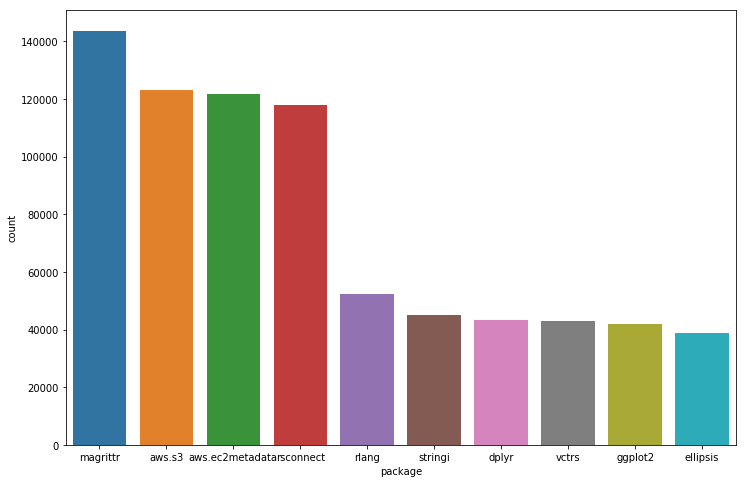

In [15]:
# Display distribution using bar chart
top10_packages = sns.barplot(x="package", y="count", data=rlogs_viz)
rcParams['figure.figsize'] = 6,4